In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Read the data from csv file
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# count the number of rows and columns in dataset 
df.shape

(730, 16)

In [4]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Rename the some column name for the batter understanding
df.rename(columns={'dteday' : 'dateday'},inplace = True)
df.rename(columns={'yr' : 'year'},inplace = True)
df.rename(columns={'mnth' : 'month'},inplace = True)
df.rename(columns={'hum' : 'humidity'},inplace = True)
df.rename(columns={'dteday' : 'dateday'},inplace = True)

In [6]:
# Check the columns
df.columns

Index(['instant', 'dateday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Again check the dataset
df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# check the details of numeriacl data
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Check the null values
df.isnull().sum()

instant       0
dateday       0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Cleaning the Data

### Drop the unnecessary columns
 ### Instant, dateday, casual, registered
  

In [10]:
# Drop the columns
df.drop(['instant'], axis = 1, inplace = True)
df.drop(['dateday'], axis = 1, inplace = True)
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)


In [11]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Convert season and weathersit to categorical types

## Change month number into string and weekday into day

In [12]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
df.weathersit.replace({1:"good", 2:"moderate", 3:"bad"}, inplace = True)
df.month = df.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Check the value counts of weathersit
df.weathersit.value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [14]:
# Show the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## EDA

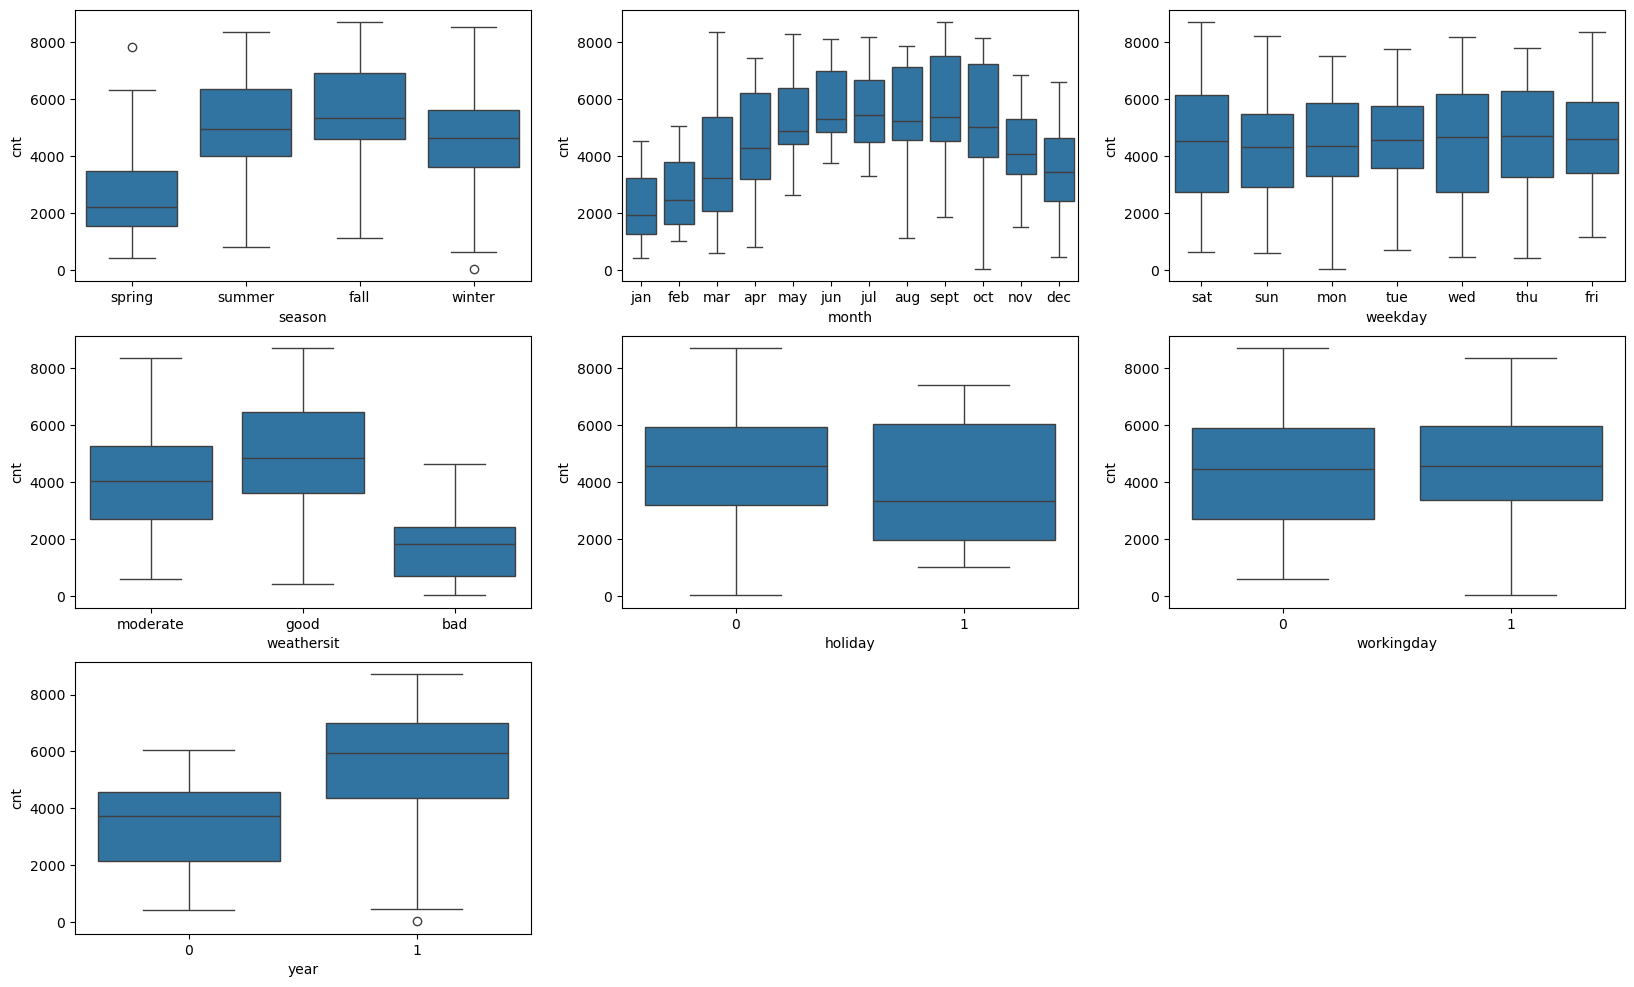

In [15]:
# Anlysing the categorical data 
plt.figure(figsize = [20,12])
plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "cnt", data = df)
plt.subplot(3,3,2)
sns.boxplot(x = "month", y = "cnt", data = df)
plt.subplot(3,3,3)
sns.boxplot(x = "weekday", y = "cnt", data = df)
plt.subplot(3,3,4)
sns.boxplot(x = "weathersit", y = "cnt", data = df)
plt.subplot(3,3,5)
sns.boxplot(x = "holiday", y = "cnt", data = df)
plt.subplot(3,3,6)
sns.boxplot(x = "workingday", y = "cnt", data = df)
plt.subplot(3,3,7)
sns.boxplot(x = "year", y = "cnt", data = df)
plt.show()

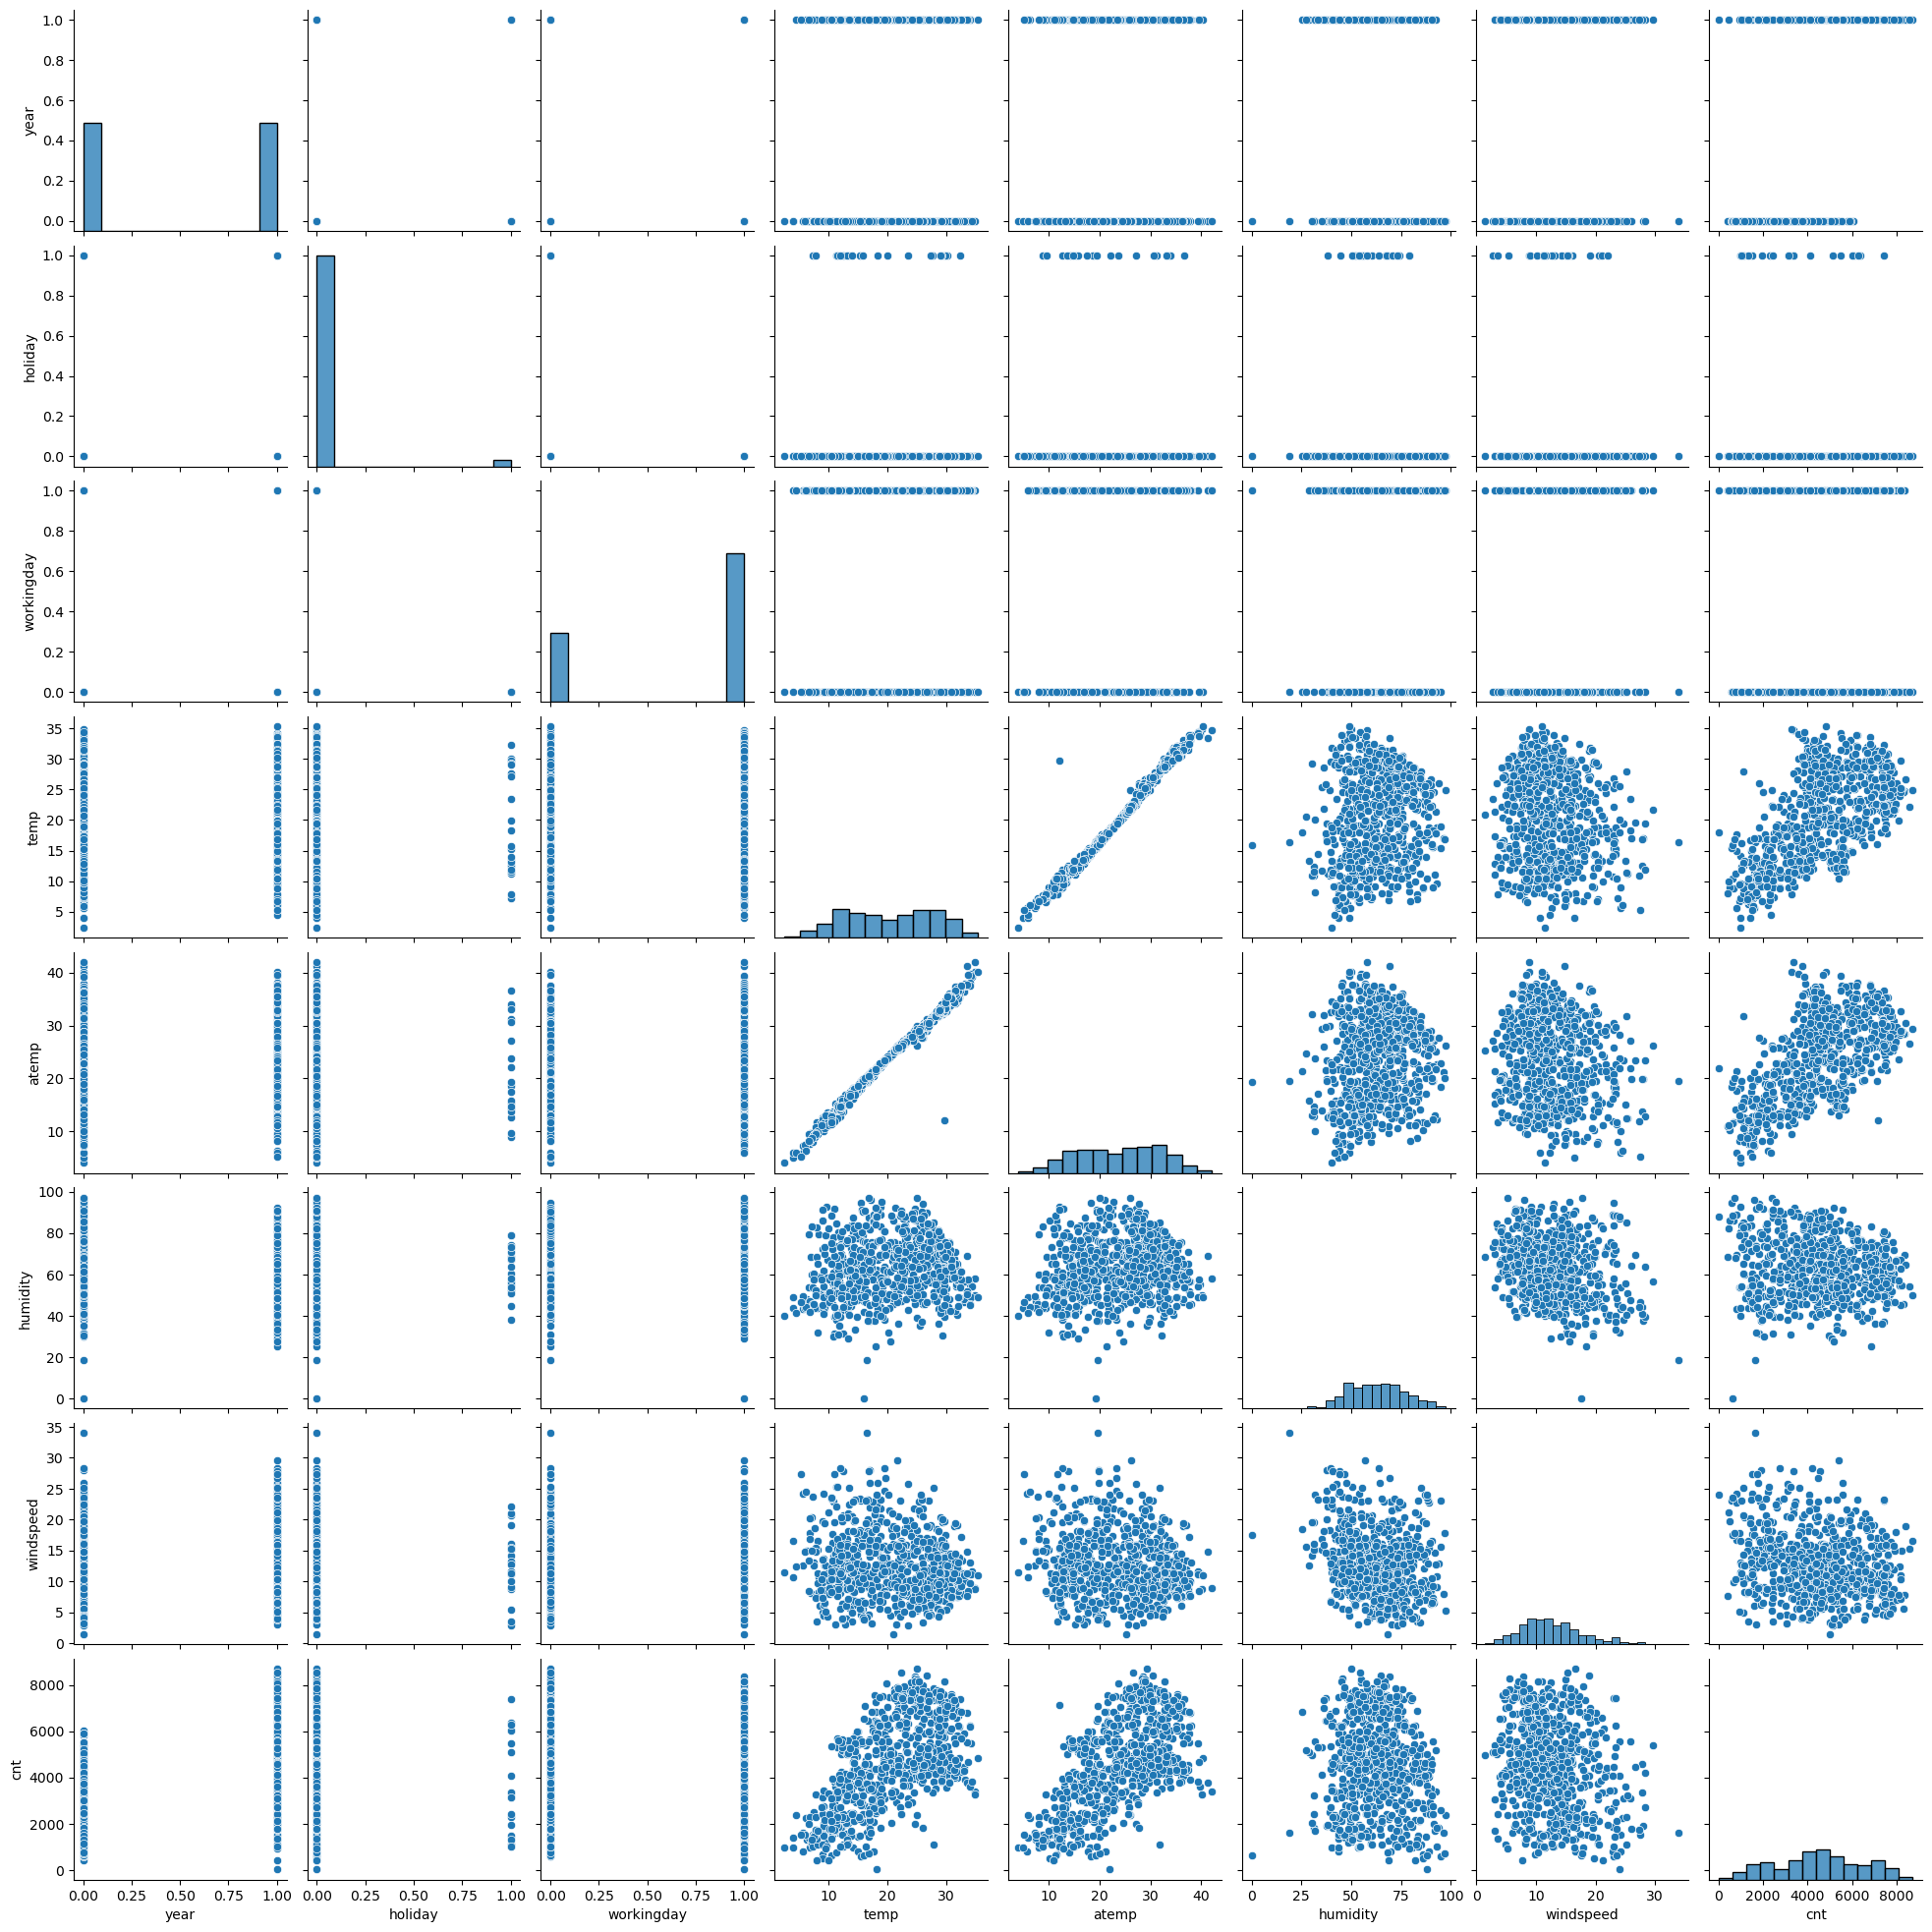

In [16]:
# Crate a pair plot
sns.pairplot(df)
plt.show()

### It shows temprature and a temprature highest corelation with the cnt 
### tem and atem highly corelated with each other

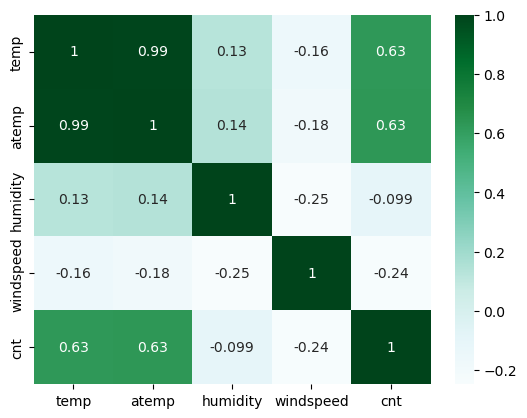

In [17]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

## It shows cnt highly corelated with temp,atemp

In [18]:
# Describe the variables
df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


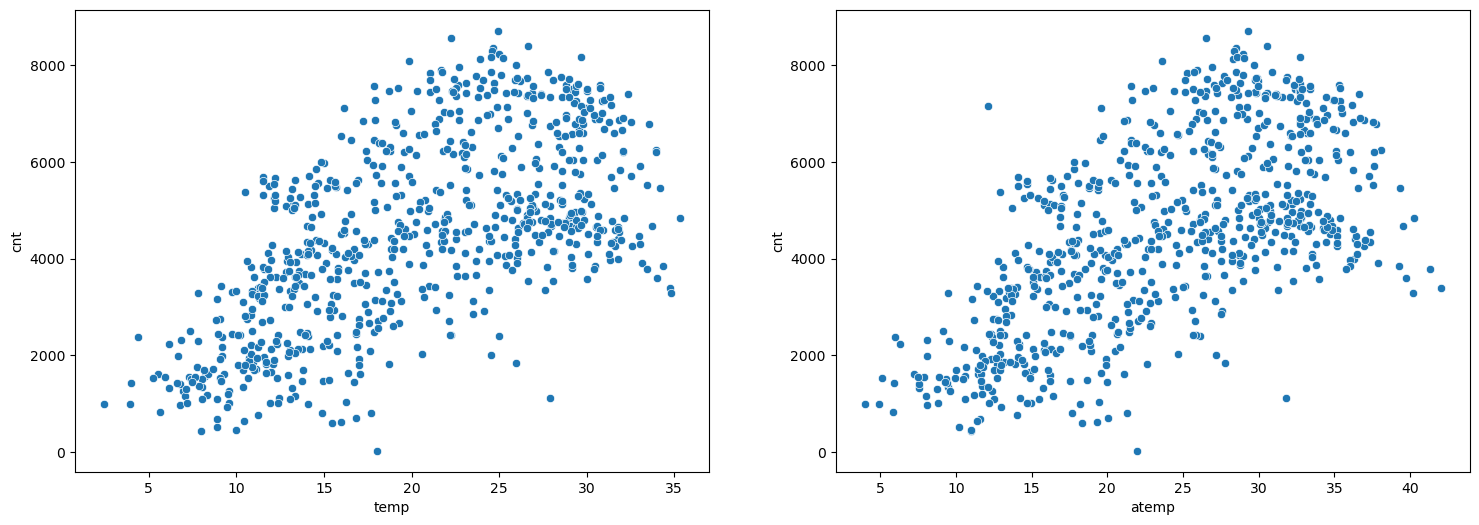

In [19]:
# Analyse using the scatter plot with cnt and temp,atemp
plt.figure(figsize= [18,6])
plt.subplot(1,2,1)
sns.scatterplot(data = df, x= "temp", y= "cnt")
plt.subplot(1,2,2)
sns.scatterplot(data = df, x= "atemp", y= "cnt")
plt.show()

## Data prepararion for Linear Regerasssion 

In [20]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Create dummy variables for month,season,weekday,weathersit.
col_1=["season","month","weekday","weathersit"]
df= pd.get_dummies(df,columns = col_1, drop_first = True, dtype =int)

In [22]:
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [23]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    int32  
 9   season_summer        730 non-null    int32  
 10  season_winter        730 non-null    int32  
 11  month_aug            730 non-null    int32  
 12  month_dec            730 non-null    int32  
 13  month_feb            730 non-null    int32  
 14  month_jan            730 non-null    int32  
 15  month_jul            730 non-null    int

In [25]:
df.shape

(730, 30)

## Train_Test_Split

In [26]:
df_train,df_test = train_test_split(df,train_size = .70, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [27]:
# Initiate an object
scaler = MinMaxScaler()

# Create a liat of numerical variables
num_vars = ["temp","atemp","humidity","windspeed","cnt"]

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


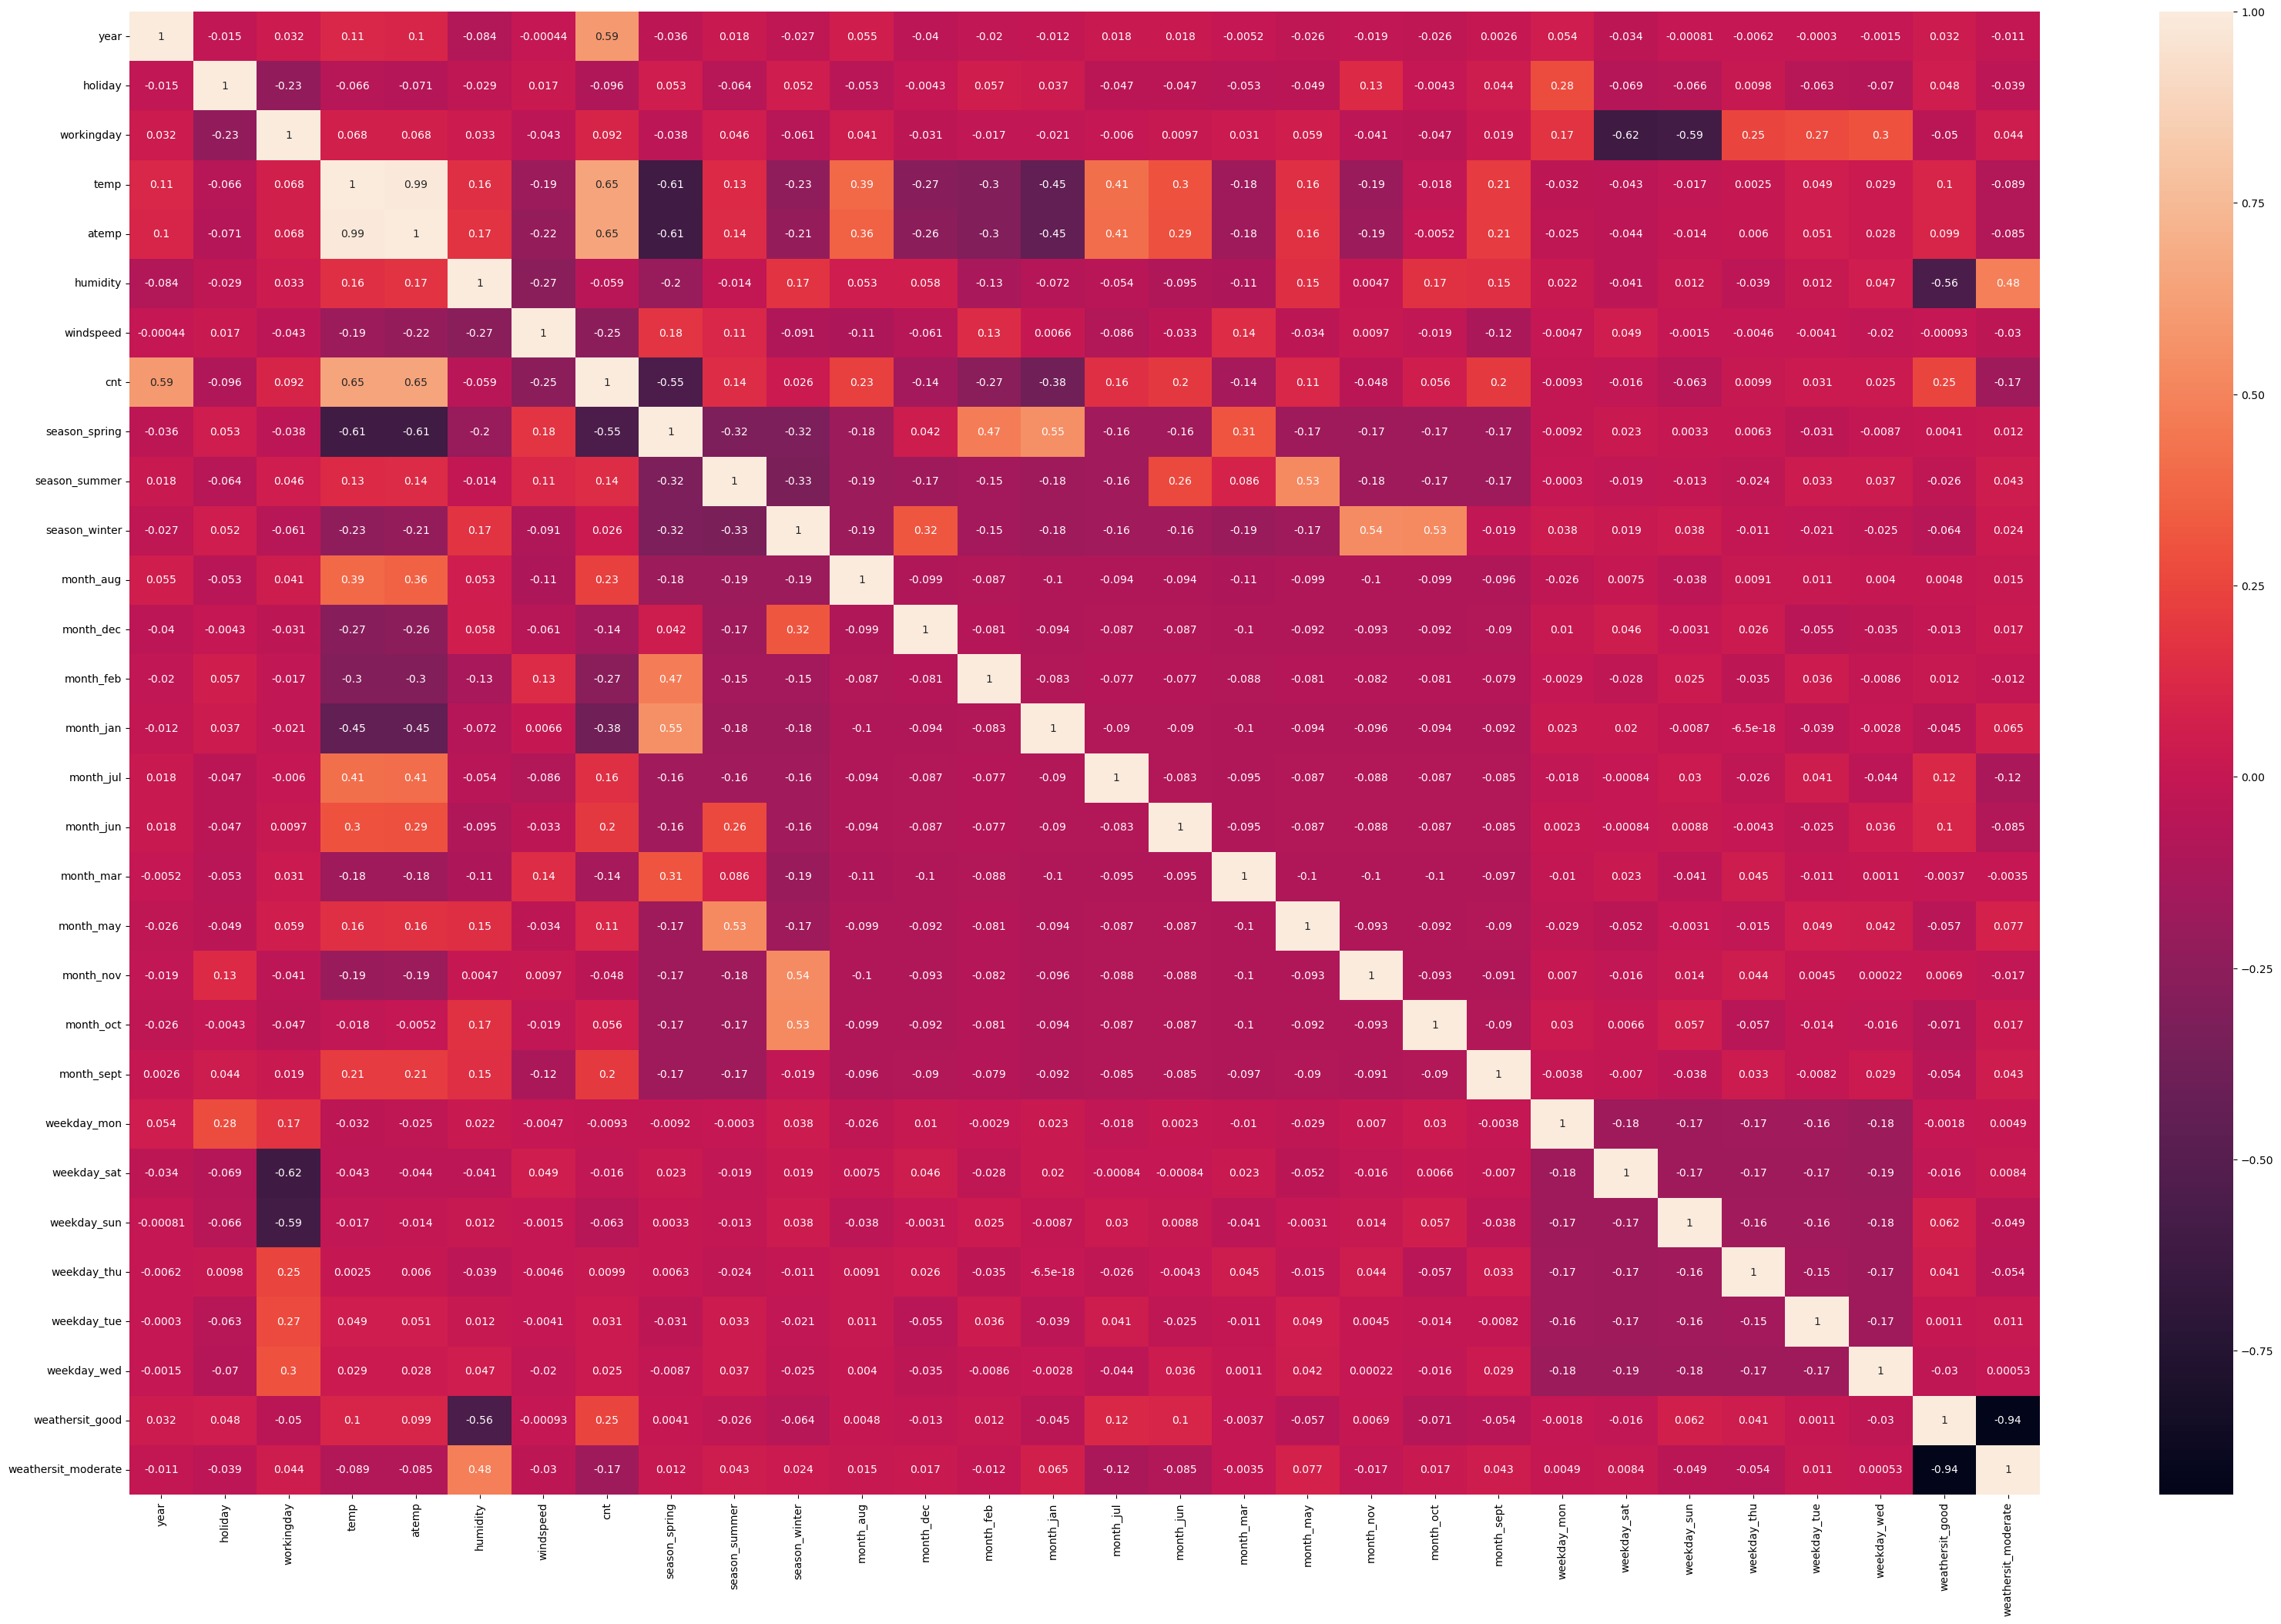

In [28]:
# Create a heatmap
plt.figure(figsize= [40,25])
sns.heatmap(df_train.corr(),annot =True)
plt.show()

### cnt seems to a corelation with year, 
### temp and atemp similarly spring shows with jan and feb,
### summer shows with may and june, winter shows with oct and nov. 

In [29]:
y_train = df_train.pop("cnt")
X_train = df_train

## Build model using RFE

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
#Cut down number of features to 10 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [32]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', False, 17),
 ('month_aug', False, 11),
 ('month_dec', False, 13),
 ('month_feb', False, 7),
 ('month_jan', False, 4),
 ('month_jul', True, 1),
 ('month_jun', False, 16),
 ('month_mar', False, 15),
 ('month_may', False, 9),
 ('month_nov', False, 19),
 ('month_oct', False, 3),
 ('month_sept', False, 2),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 18),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 20),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [33]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [34]:
# Features are selected by RFE
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True])

In [35]:
# Dispaly the support columns
df_train.loc[:,rfe.support_].columns

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'month_jul', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [36]:
# Check the data set of support columns
x_train_rfe= df_train[df_train.columns[rfe.support_]]
x_train_rfe.head()

,year,holiday,temp,atemp,humidity,windspeed,season_spring,month_jul,weathersit_good,weathersit_moderate
576,1,0,0.815169,0.766351,0.725633,0.264686,0,1,1,0
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1
728,1,0,0.245101,0.200348,0.498067,0.663106,1,0,1,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,0,0,1
111,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,1


## MODEL 1

In [37]:
# Add aconstant
x_train_rfe = sm.add_constant(x_train_rfe)
#Prepare a model
lm = sm.OLS(y_train,x_train_rfe).fit()
#Print the model
print(lm.summary())

# Create a def function to check the VIF 
def checkVIF(x):
    vif= pd.DataFrame()
    vif['Feature'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by = "VIF",ascending = False)
    return (vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.84e-183
Time:                        22:21:56   Log-Likelihood:                 487.08
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     499   BIC:                            -905.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1403    

#### Dropping the column atemp because it shows multicolliniarity

In [38]:
x_train_new = x_train_rfe.drop(["atemp"],axis =1)

## MODEL 2

In [39]:
# Again create a model without atemp
x_train_new = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.19e-184
Time:                        22:21:56   Log-Likelihood:                 486.43
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     500   BIC:                            -910.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1411    

#### Check the VIF 

In [40]:
checkVIF(x_train_new)

,Feature,VIF
0,const,119.61
8,weathersit_good,10.15
9,weathersit_moderate,8.80
3,temp,2.00
4,humidity,1.81
6,season_spring,1.64
7,month_jul,1.25
5,windspeed,1.16
1,year,1.03
2,holiday,1.01


#### Dropping the column good because it shows multicolliniarity

In [41]:
x_train_new = x_train_new.drop(["weathersit_good"],axis =1)

## MODEL 3

In [42]:
x_train_new = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.71e-170
Time:                        22:21:56   Log-Likelihood:                 450.75
No. Observations:                 510   AIC:                            -883.5
Df Residuals:                     501   BIC:                            -845.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4440    

In [43]:
checkVIF(x_train_new)

,Feature,VIF
0,const,49.33
3,temp,1.97
6,season_spring,1.64
4,humidity,1.52
8,weathersit_moderate,1.37
7,month_jul,1.25
5,windspeed,1.12
1,year,1.03
2,holiday,1.01


In [44]:
# Predict the y_train
y_train_cnt = lm.predict(x_train_new)

In [45]:
y_train_cnt

576    0.702363
426    0.486194
728    0.367876
482    0.656015
111    0.293453
         ...   
578    0.853716
53     0.258345
350    0.281705
79     0.310452
520    0.677383
Length: 510, dtype: float64

## Residual Analysis

In [46]:
res = y_train-y_train_cnt

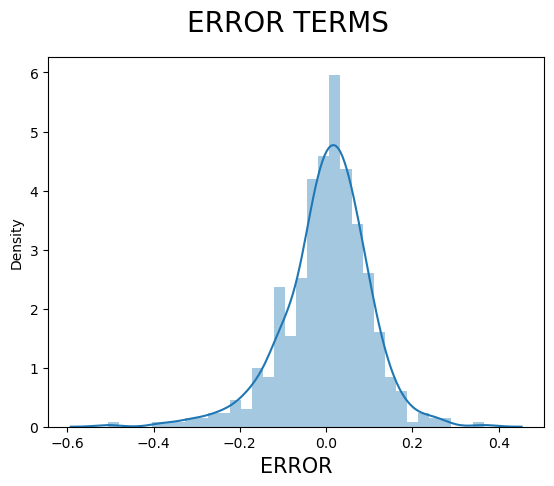

In [47]:
# Plot a distplot to check the error terms 
fig = plt.figure()
sns.distplot(res)
fig.suptitle("ERROR TERMS" , fontsize = 20)
plt.xlabel("ERROR",fontsize =15)
plt.show()

In [48]:
# Create a liat of numerical variables
num_vars_1 = ["temp","atemp","humidity","windspeed","cnt"]

# Transform on data
df_test[num_vars_1] = scaler.transform(df_test[num_vars_1])
df_test[num_vars_1]

,temp,atemp,humidity,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029
...,...,...,...,...,...
702,0.519232,0.511907,0.756118,0.283397,0.757478
127,0.584649,0.577380,0.650923,0.069510,0.495973
640,0.745598,0.682653,0.817947,0.052115,0.868615
72,0.331557,0.332005,0.512107,0.203418,0.232858


In [49]:
y_test = df_test.pop("cnt")
x_test= df_test

In [50]:
# Add a constant
x_test_new = sm.add_constant(x_test)

In [51]:
## Drop the unnecessary variable only select train variables
x_test_new = x_test_new.drop([  'workingday',  'atemp', 'season_summer', 'season_winter','month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct','month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun','weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_good'
       ],axis = 1)

In [52]:
# Predic the y_test
y_test_pred = lm.predict(x_test_new)

## Model Evaluation

In [53]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.8018184429324638

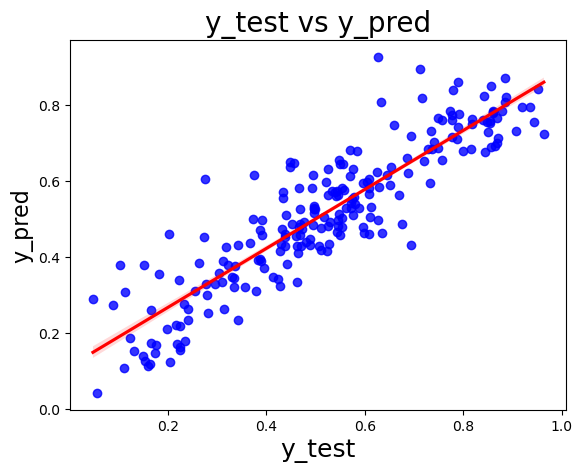

In [54]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Conclusion
### Significant variables to predict the demand for shared bikes

#### holiday
#### temp
#### Weathersit
#### humidity
#### windspeed
#### Spring
#### July
#### Year